# Volume 06

### Introdução ao Pandas

In [62]:
import pandas as pd
import numpy as np

In [63]:
df_bancos = pd.DataFrame({
    'banco': ['Itaú Unibanco', 'Bradesco', 'Banco do Brasil', 'Santander Brasil'],
    'cotacao_acao': [45.50, 29.10, 52.10, 36.50],
    'segmento': ['Tradicional', 'Tradicional', 'Tradicional', 'Tradicional']
}, index=['2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25'])

print("DataFrame Original:")
print(df_bancos)

DataFrame Original:
                       banco  cotacao_acao     segmento
2025-09-22     Itaú Unibanco          45.5  Tradicional
2025-09-23          Bradesco          29.1  Tradicional
2025-09-24   Banco do Brasil          52.1  Tradicional
2025-09-25  Santander Brasil          36.5  Tradicional


In [64]:
# Usando .at para buscar um valor específico
cotacao_bb = df_bancos.at['2025-09-24', 'cotacao_acao']

print(f"\n1. Valor da cotação do BB em 2025-09-24: {cotacao_bb}")
print(f"   Tipo do dado retornado: {type(cotacao_bb)}")


1. Valor da cotação do BB em 2025-09-24: 52.1
   Tipo do dado retornado: <class 'numpy.float64'>


In [65]:
def generate_series(initial_value, volatility, periods, start_date, frequency="ME"):
    """
    Generates a historical time series based on an initial value and volatility.
    Args:
        initial_value (float): The starting value of the series.
        volatility (float): The volatility for the random walk (e.g., 0.02 for 2%).
        periods (int): The number of periods to generate.
        start_date (str or datetime): The starting date for the series.
        frequency (str, optional): The frequency for the date range (Pandas offset alias). 
                                   Defaults to "ME" (Month End).

    Returns:
        pd.Series: A Pandas Series with a DatetimeIndex.
    """    
    prices = [initial_value]    
    for i in range(periods - 1):
        price = prices[i] * (1 + np.random.normal(0, volatility))
        prices.append(price)
    
    series = pd.Series(prices, index=pd.date_range(start_date, 
                                                   periods=periods, 
                                                   freq=frequency))
                                
    return series

In [66]:
serie_euro = generate_series(5, 0.01, 5, "2025-01-01")
serie_cotation = generate_series(20, 0.05, 5, "2025-01-01")
serie_cotation

2025-01-31    20.000000
2025-02-28    18.629988
2025-03-31    19.653795
2025-04-30    18.824911
2025-05-31    18.273955
Freq: ME, dtype: float64

In [67]:
serie_euro

2025-01-31    5.000000
2025-02-28    5.003594
2025-03-31    4.993962
2025-04-30    4.923923
2025-05-31    4.992987
Freq: ME, dtype: float64

In [68]:
#as operações aritméticas são feitas através dos índices! 

serie_cotation_euro = serie_cotation/serie_euro
serie_cotation_euro

2025-01-31    4.000000
2025-02-28    3.723322
2025-03-31    3.935511
2025-04-30    3.823153
2025-05-31    3.659925
Freq: ME, dtype: float64

In [69]:
serie_profit = generate_series(2, 0.5, 5, "2022-01-01")
serie_cotation = generate_series(20, 0.05, 5, "2022-01-01")


df = pd.DataFrame({"cotation": serie_cotation,
                   "profit_by_stock": serie_profit})

df

,cotation,profit_by_stock
2022-01-31,20.000000,2.000000
2022-02-28,19.905847,2.299205
2022-03-31,20.111214,3.172275
2022-04-30,19.747310,4.350504
2022-05-31,18.386073,4.330903


In [70]:
#criando coluna P/L

df['PL'] = df['cotation']/df['profit_by_stock']

df

,cotation,profit_by_stock,PL
2022-01-31,20.000000,2.000000,10.000000
2022-02-28,19.905847,2.299205,8.657709
2022-03-31,20.111214,3.172275,6.339682
2022-04-30,19.747310,4.350504,4.539086
2022-05-31,18.386073,4.330903,4.245321


In [71]:
#pode fazer qualquer operação 

print(df['cotation'] + df['profit_by_stock'])
print(df['cotation'] - df['profit_by_stock'])
print(df['cotation'] ** df['profit_by_stock'])

2022-01-31    22.000000
2022-02-28    22.205052
2022-03-31    23.283489
2022-04-30    24.097814
2022-05-31    22.716976
Freq: ME, dtype: float64
2022-01-31    18.000000
2022-02-28    17.606642
2022-03-31    16.938939
2022-04-30    15.396806
2022-05-31    14.055170
Freq: ME, dtype: float64
2022-01-31       400.000000
2022-02-28       969.667052
2022-03-31     13641.584703
2022-04-30    432625.656872
2022-05-31    299487.748207
Freq: ME, dtype: float64


In [80]:
serie_profit_trimestral = generate_series(20000, 0.1, 4, "2025-09-01", frequency="QE") 
print("--- Série de Lucro Trimestral ---")
print(serie_profit_trimestral)

profit_anual = serie_profit_trimestral.sum()
print("\n--- Soma do Lucro Anual ---")
print(profit_anual)

--- Série de Lucro Trimestral ---
2025-09-30    20000.000000
2025-12-31    19466.957083
2026-03-31    19693.178908
2026-06-30    21397.506367
Freq: QE-DEC, dtype: float64

--- Soma do Lucro Anual ---
80557.64235871116


In [73]:
#acumular dados de uma coluna

serie_profit_trimestral = generate_series(20000, 2, 4, "2025-01-01", frequency = "QE")

print(serie_profit_trimestral)

crescimento_lucros  = serie_profit_trimestral.cumsum()

crescimento_lucros

2025-03-31     20000.000000
2025-06-30     20541.087662
2025-09-30     49183.468057
2025-12-31    102767.975606
Freq: QE-DEC, dtype: float64


2025-03-31     20000.000000
2025-06-30     40541.087662
2025-09-30     89724.555720
2025-12-31    192492.531326
Freq: QE-DEC, dtype: float64

In [74]:
#maior e menor dado de lucro no trimestre

In [75]:
serie_profit_trimestral = generate_series(20000, 2, 4, "2025-01-01", frequency = "QE")

print(serie_profit_trimestral)

profit_max = serie_profit_trimestral.max()
profit_min = serie_profit_trimestral.min()

print(profit_min)
print(profit_max)

2025-03-31     20000.000000
2025-06-30    -18940.991152
2025-09-30    -70171.032935
2025-12-31    208981.064210
Freq: QE-DEC, dtype: float64
-70171.03293480654
208981.06421006407


In [76]:
import pandas as pd

# Criando um índice com frequência de dias úteis ('B' - Business Day)
# Começando em 29 de setembro de 2025 (uma segunda-feira)
datas = pd.date_range(start='2025-09-29', periods=7, freq='B')

serie_temporal = pd.Series(range(7), index=datas)

print("Série Temporal com Frequência de Dias Úteis:")
print(serie_temporal)

# Verificando o atributo de frequência do índice
print(f"\nA frequência do índice é: {serie_temporal.index.freq}")

Série Temporal com Frequência de Dias Úteis:
2025-09-29    0
2025-09-30    1
2025-10-01    2
2025-10-02    3
2025-10-03    4
2025-10-06    5
2025-10-07    6
Freq: B, dtype: int64

A frequência do índice é: <BusinessDay>


In [77]:
# Usando a série 'serie_temporal' criada anteriormente
print("Série Original (frequência de dias úteis):")
print(serie_temporal)

# Reamostrando para frequência mensal ('ME'), somando os valores de cada mês
mensal = serie_temporal.resample('ME').sum()

print("\nSérie Reamostrada para Mensal (soma):")
print(mensal)

Série Original (frequência de dias úteis):
2025-09-29    0
2025-09-30    1
2025-10-01    2
2025-10-02    3
2025-10-03    4
2025-10-06    5
2025-10-07    6
Freq: B, dtype: int64

Série Reamostrada para Mensal (soma):
2025-09-30     1
2025-10-31    20
Freq: ME, dtype: int64


In [78]:
import pandas as pd
carteira = pd.Series(['SANB11', 'VALE3', 'ITUB4', 'VALE3', 'SANB11', 'BBDC4', 'VALE3'])
frequencia_acoes = carteira.value_counts()

print("Frequência de cada ação na carteira:")
print(frequencia_acoes)
frequencia_relativa = carteira.value_counts(normalize=True)
print("\nFrequência Relativa (Percentual):")
print(frequencia_relativa)

Frequência de cada ação na carteira:
VALE3     3
SANB11    2
ITUB4     1
BBDC4     1
Name: count, dtype: int64

Frequência Relativa (Percentual):
VALE3     0.428571
SANB11    0.285714
ITUB4     0.142857
BBDC4     0.142857
Name: proportion, dtype: float64


In [85]:
import pandas as pd
dados = {
    'Ticker': ['ITUB4', 'BBDC4', 'BBAS3', 'SANB11'],
    'Preco_Abertura': [32.50, 15.20, 55.80, 30.10],
    'Preco_Fechamento': [32.80, 15.10, 56.10, 30.00],
    'Volume_Negociado': [50_000_000, 45_000_000, 60_000_000, 30_000_000], # Em R$
    'Dividendos_Anteriores': [1.50, 0.80, 2.10, 1.20] # Dividendos pagos nos últimos 12 meses
}

df_bancos = pd.DataFrame(dados, index=dados['Ticker']) # Usando Ticker como índice
df_bancos.drop('Ticker', axis=1, inplace=True) # Removendo a coluna Ticker que virou índice

print("DataFrame de Ações de Bancos:")
print(df_bancos)

DataFrame de Ações de Bancos:
        Preco_Abertura  Preco_Fechamento  Volume_Negociado  \
ITUB4             32.5              32.8          50000000   
BBDC4             15.2              15.1          45000000   
BBAS3             55.8              56.1          60000000   
SANB11            30.1              30.0          30000000   

        Dividendos_Anteriores  
ITUB4                     1.5  
BBDC4                     0.8  
BBAS3                     2.1  
SANB11                    1.2  


# Calculando a Variação Diária (em valor absoluto)
Uma das operações mais básicas é ver o quanto o preço de uma ação mudou durante o dia.

Fórmula: Variacao_R$ = Preco_Fechamento - Preco_Abertura

In [ ]:
# Criando uma nova coluna 'Variacao_R$'
df_bancos['Variacao_R$'] = df_bancos['Preco_Fechamento'] - df_bancos['Preco_Abertura']
print("\nDataFrame com a Variação Diária em R$:")
print(df_bancos)


DataFrame com a Variação Diária em R$:
        Preco_Abertura  Preco_Fechamento  Volume_Negociado  \
ITUB4             32.5              32.8          50000000   
BBDC4             15.2              15.1          45000000   
BBAS3             55.8              56.1          60000000   
SANB11            30.1              30.0          30000000   

        Dividendos_Anteriores  Variacao_R$  
ITUB4                     1.5          0.3  
BBDC4                     0.8         -0.1  
BBAS3                     2.1          0.3  
SANB11                    1.2         -0.1  


# 2. Calculando a Variação Diária (em percentual)
O percentual é muitas vezes mais útil para comparar o desempenho entre ativos de preços diferentes.

Fórmula: Variacao_% = (Preco_Fechamento / Preco_Abertura) - 1

In [91]:
# Criando a coluna 'Variacao_%'
# Multiplicamos por 100 no final para formatar como porcentagem
df_bancos['Variacao_%'] = ((df_bancos['Preco_Fechamento'] / df_bancos['Preco_Abertura']) - 1) * 100

print("\nDataFrame com a Variação Diária em Percentual:")
# Usando .round(2) para formatar a visualização
print(df_bancos.round(2))


DataFrame com a Variação Diária em Percentual:
        Preco_Abertura  Preco_Fechamento  Volume_Negociado  \
ITUB4             32.5              32.8          50000000   
BBDC4             15.2              15.1          45000000   
BBAS3             55.8              56.1          60000000   
SANB11            30.1              30.0          30000000   

        Dividendos_Anteriores  Variacao_R$  Variacao_%  
ITUB4                     1.5          0.3        0.92  
BBDC4                     0.8         -0.1       -0.66  
BBAS3                     2.1          0.3        0.54  
SANB11                    1.2         -0.1       -0.33  


In [92]:
# Criando a coluna 'Dividend_Yield_%'
df_bancos['Dividend_Yield_%'] = (df_bancos['Dividendos_Anteriores'] / df_bancos['Preco_Fechamento']) * 100

print("\nDataFrame com o cálculo do Dividend Yield:")
print(df_bancos.round(2))


DataFrame com o cálculo do Dividend Yield:
        Preco_Abertura  Preco_Fechamento  Volume_Negociado  \
ITUB4             32.5              32.8          50000000   
BBDC4             15.2              15.1          45000000   
BBAS3             55.8              56.1          60000000   
SANB11            30.1              30.0          30000000   

        Dividendos_Anteriores  Variacao_R$  Variacao_%  Dividend_Yield_%  
ITUB4                     1.5          0.3        0.92              4.57  
BBDC4                     0.8         -0.1       -0.66              5.30  
BBAS3                     2.1          0.3        0.54              3.74  
SANB11                    1.2         -0.1       -0.33              4.00  


In [93]:
taxa_fixa_por_real = 0.0001 # Exemplo: 0.01%

# Criando a coluna 'Taxa_B3'
df_bancos['Taxa_B3'] = df_bancos['Volume_Negociado'] * taxa_fixa_por_real

print("\nDataFrame com a Taxa da B3 calculada:")
print(df_bancos)


DataFrame com a Taxa da B3 calculada:
        Preco_Abertura  Preco_Fechamento  Volume_Negociado  \
ITUB4             32.5              32.8          50000000   
BBDC4             15.2              15.1          45000000   
BBAS3             55.8              56.1          60000000   
SANB11            30.1              30.0          30000000   

        Dividendos_Anteriores  Variacao_R$  Variacao_%  Dividend_Yield_%  \
ITUB4                     1.5          0.3    0.923077          4.573171   
BBDC4                     0.8         -0.1   -0.657895          5.298013   
BBAS3                     2.1          0.3    0.537634          3.743316   
SANB11                    1.2         -0.1   -0.332226          4.000000   

        Taxa_B3  
ITUB4    5000.0  
BBDC4    4500.0  
BBAS3    6000.0  
SANB11   3000.0  


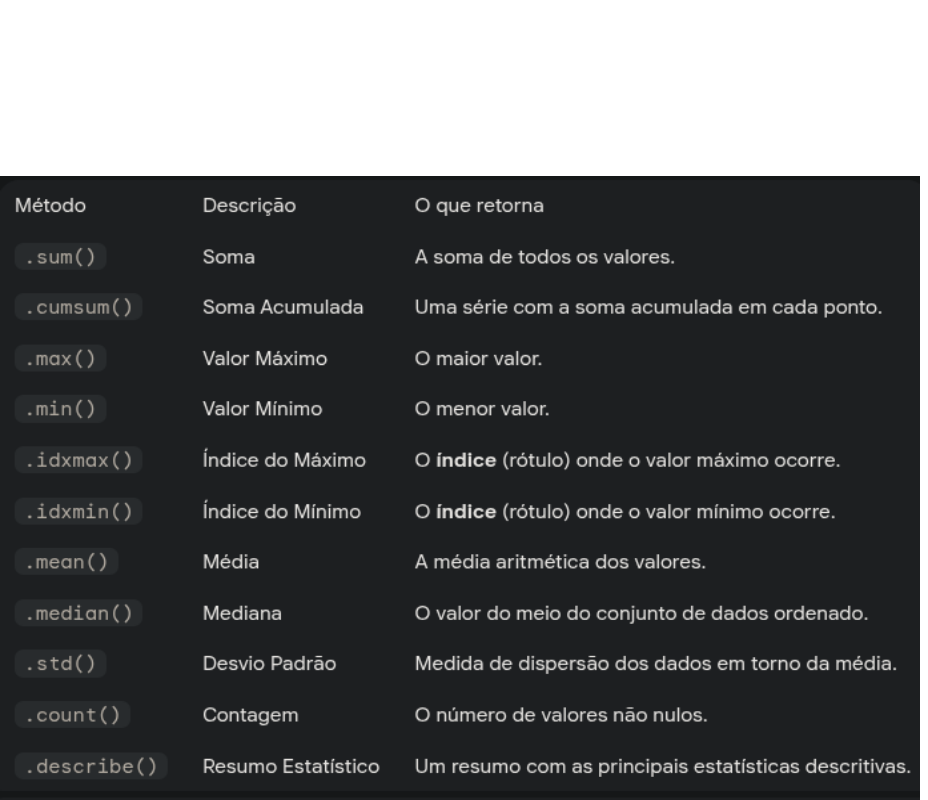

In [94]:
import pandas as pd
import numpy as np
tickers = ['ITUB4', 'BBDC4', 'BBAS3', 'SANB11']
datas = pd.date_range(start='2025-09-15', periods=10, freq='B') # 10 dias úteis

np.random.seed(42) # Semente para reprodutibilidade
dados_retornos = np.random.normal(loc=0.05, scale=2, size=(10, 4))
# Volume negociado em R$ (entre 30M e 100M)
dados_volume = np.random.randint(low=30_000_000, high=100_000_000, size=(10, 4))
df_retornos = pd.DataFrame(dados_retornos, index=datas, columns=tickers)
df_volume = pd.DataFrame(dados_volume, index=datas, columns=tickers)

print("--- Retorno Diário Percentual (%) ---")
print(df_retornos.round(2))

print("\n--- Volume Financeiro Negociado (R$) ---")
print(df_volume)

--- Retorno Diário Percentual (%) ---
            ITUB4  BBDC4  BBAS3  SANB11
2025-09-15   1.04  -0.23   1.35    3.10
2025-09-16  -0.42  -0.42   3.21    1.58
2025-09-17  -0.89   1.14  -0.88   -0.88
2025-09-18   0.53  -3.78  -3.40   -1.07
2025-09-19  -1.98   0.68  -1.77   -2.77
2025-09-22   2.98  -0.40   0.19   -2.80
2025-09-23  -1.04   0.27  -2.25    0.80
2025-09-24  -1.15  -0.53  -1.15    3.75
2025-09-25   0.02  -2.07   1.70   -2.39
2025-09-26   0.47  -3.87  -2.61    0.44

--- Volume Financeiro Negociado (R$) ---
               ITUB4     BBDC4     BBAS3    SANB11
2025-09-15  33584702  82631083  38585377  47824013
2025-09-16  66601694  97105583  90304654  64119117
2025-09-17  66433622  90031992  85105831  33366612
2025-09-18  88743503  66258670  99739572  85848857
2025-09-19  87055419  79160571  98394024  94525468
2025-09-22  68727468  81757120  97157848  78170987
2025-09-23  82562567  53717335  90472382  42719242
2025-09-24  78715250  74054178  68334882  82441466
2025-09-25  79583876 

In [95]:
retorno_total = df_retornos.sum()
volume_total = df_volume.sum()

print("--- Retorno Total (Soma Simples) no Período ---")
print(retorno_total.round(2))
print("\n--- Volume Total Negociado no Período (em R$) ---")
print(volume_total)

--- Retorno Total (Soma Simples) no Período ---
ITUB4    -0.42
BBDC4    -9.21
BBAS3    -5.62
SANB11   -0.24
dtype: float64

--- Volume Total Negociado no Período (em R$) ---
ITUB4     733335856
BBDC4     755050234
BBAS3     770047924
SANB11    670104023
dtype: int64



--- Evolução do Retorno Acumulado (%) ---
            ITUB4  BBDC4  BBAS3  SANB11
2025-09-15   1.04  -0.23   1.35    3.10
2025-09-16   0.63  -0.64   4.55    4.68
2025-09-17  -0.26   0.49   3.68    3.80
2025-09-18   0.27  -3.29   0.28    2.72
2025-09-19  -1.71  -2.61  -1.49   -0.05
2025-09-22   1.28  -3.01  -1.30   -2.85
2025-09-23   0.24  -2.74  -3.56   -2.05
2025-09-24  -0.91  -3.27  -4.71    1.71
2025-09-25  -0.89  -5.34  -3.01   -0.68
2025-09-26  -0.42  -9.21  -5.62   -0.24


Text(0, 0.5, 'Retorno Acumulado (%)')

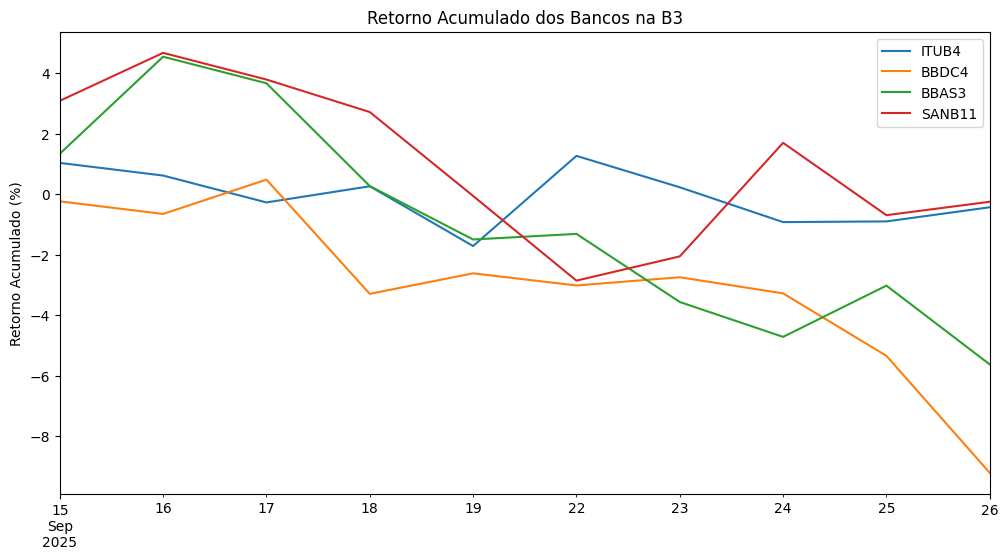

In [ ]:
retorno_acumulado = df_retornos.cumsum()
print("\n--- Evolução do Retorno Acumulado (%) ---")
print(retorno_acumulado.round(2))
# Visualização gráfica é excelente para cumsum()
retorno_acumulado.plot(
    figsize=(12, 6),
    title='Retorno Acumulado dos Bancos na B3'
).set_ylabel("Retorno Acumulado (%)")

In [97]:
maior_ganho_diario = df_retornos.max()
maior_perda_diaria = df_retornos.min()

print(f"\n--- Maior Ganho Diário (%) ---")
print(maior_ganho_diario.round(2))
print(f"\n--- Maior Perda Diária (%) ---")
print(maior_perda_diaria.round(2))


--- Maior Ganho Diário (%) ---
ITUB4     2.98
BBDC4     1.14
BBAS3     3.21
SANB11    3.75
dtype: float64

--- Maior Perda Diária (%) ---
ITUB4    -1.98
BBDC4    -3.87
BBAS3    -3.40
SANB11   -2.80
dtype: float64


In [98]:
data_melhor_dia = df_retornos.idxmax()
data_pior_dia = df_retornos.idxmin()

print(f"\n--- Data do Melhor Dia para cada Banco ---")
print(data_melhor_dia)
print(f"\n--- Data do Pior Dia para cada Banco ---")
print(data_pior_dia)


--- Data do Melhor Dia para cada Banco ---
ITUB4    2025-09-22
BBDC4    2025-09-17
BBAS3    2025-09-16
SANB11   2025-09-24
dtype: datetime64[ns]

--- Data do Pior Dia para cada Banco ---
ITUB4    2025-09-19
BBDC4    2025-09-26
BBAS3    2025-09-18
SANB11   2025-09-22
dtype: datetime64[ns]


In [99]:
retorno_medio = df_retornos.mean()
volatilidade = df_retornos.std() # Desvio padrão é a medida de volatilidade/risco

print(f"\n--- Retorno Médio Diário (%) ---")
print(retorno_medio.round(2))
print(f"\n--- Volatilidade (Risco) Diária (%) ---")
print(volatilidade.round(2))


--- Retorno Médio Diário (%) ---
ITUB4    -0.04
BBDC4    -0.92
BBAS3    -0.56
SANB11   -0.02
dtype: float64

--- Volatilidade (Risco) Diária (%) ---
ITUB4     1.40
BBDC4     1.75
BBAS3     2.12
SANB11    2.36
dtype: float64


In [100]:
resumo_estatistico = df_retornos.describe().round(2)
print("\n--- Resumo Estatístico dos Retornos Diários ---")
print(resumo_estatistico)


--- Resumo Estatístico dos Retornos Diários ---
       ITUB4  BBDC4  BBAS3  SANB11
count  10.00  10.00  10.00   10.00
mean   -0.04  -0.92  -0.56   -0.02
std     1.40   1.75   2.12    2.36
min    -1.98  -3.87  -3.40   -2.80
25%    -1.00  -1.68  -2.13   -2.06
50%    -0.20  -0.41  -1.02   -0.22
75%     0.52   0.15   1.06    1.39
max     2.98   1.14   3.21    3.75


In [102]:
print("\n--- Info Retornos Diários ---")
print(df_retornos.describe().info())


--- Info Retornos Diários ---
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB4   8 non-null      float64
 1   BBDC4   8 non-null      float64
 2   BBAS3   8 non-null      float64
 3   SANB11  8 non-null      float64
dtypes: float64(4)
memory usage: 320.0+ bytes
None


# Exercícios 

No dataframe base trabalhado em todas as aulas:

* Exercício 50: Crie uma nova coluna chamada "lucro_por_acao" e calcule o lucro por ação baseado nas informações de PL e preço. Obs: LPA = P/Indicador(PL)
* Exercício 51: Assuma a cotação do dólar como 5.25 e crie a coluna de cotações dolarizadas na tabela.
* Exercício 52: Encontre qual volume total negociado por todas as ações. 
* Exercício 53: Selecione as ações com maior e menor Lucro por ação do dataframe. Dica: use métodos de seleção ensinados na aula passada! 
